<a href="https://colab.research.google.com/github/ashishsaranshakya/learning_data_analytics/blob/main/Environment_Social_And_Governance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment, Social And Governance Data Analysis



In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Importing data from https://www.kaggle.com/datasets/tunguz/environment-social-and-governance-data/ related to the information on 17 key sustainability themes spanning environmental, social, and governance categories.

Dataset has been compiled from World Bank's ESG Data Draft

In [ ]:
base_uri='drive/MyDrive/Datasets/esg data/'
esg_data_df = pd.read_csv(base_uri+'ESGData.csv')
esg_data_df['Country Name'].unique()

In [ ]:
esg_country_series_df = pd.read_csv(base_uri+'ESGCountry-Series.csv')
esg_country_series_df.columns

In [ ]:
esg_country_df = pd.read_csv(base_uri+'ESGCountry.csv')
esg_country_df.head()

In [ ]:
esg_series_time_df = pd.read_csv(base_uri+'ESGSeries-Time.csv')
esg_series_time_df.head()

In [ ]:
esg_series_df = pd.read_csv(base_uri+'ESGSeries.csv')
esg_series_df.head()
esg_series_df[esg_series_df['Series Code']=='EG.CFT.ACCS.ZS']

Extracting data on India, South Asia and the World for comparison

In [ ]:
india_esg_df = esg_data_df[esg_data_df['Country Name']=='India']
india_esg_df.head(1)

In [ ]:
south_asia_esg_df = esg_data_df[esg_data_df['Country Name']=='South Asia']
south_asia_esg_df

In [ ]:
world_esg_df = esg_data_df[esg_data_df['Country Name']=='World']
world_esg_df

In [ ]:
def format_data(df):
  df_years = df.index[4:-1]
  df_values = df[4:-1]
  df_cleaned_years = [int(year) for year in df_years if str(year).isdigit()]
  df_cleaned_values = pd.to_numeric(df_values, errors='coerce')
  return (df_cleaned_years,df_cleaned_values)

In [246]:
def plot_country(series,ax,dash,col=None,label=None,plot=False):
  series_cleaned_years, series_cleaned_values = format_data(series)
  return ax.plot(series_cleaned_years, series_cleaned_values,dash,label=label,color=col)

In [248]:
def plot_indicator(data,indicator_name,ax,label=True):
  legend=[]
  indicator_label=''

  for df in data:
    series=df[df['Indicator Code']==indicator_name].squeeze(axis=0)
    indicator_label=series['Indicator Name']
    legend.append(series['Country Name'])
    plot_country(series,ax,'-')

  if label:
    ax.set_xlabel('Year')
    ax.set_ylabel(indicator_name)
    ax.set_title(f'{indicator_label} over time')

  ax.legend(legend)

In [249]:
def plot_all_indicator(df, countries_list,start=0,limit=-1):
  indicator_list=df['Indicator Code'].unique()[start:limit]
  fig, axes = plt.subplots(len(indicator_list), 1, figsize=(10, 20))
  countries_df_list=[]
  for name in countries_list:
    countries_df_list.append(esg_data_df[esg_data_df['Country Name']==name])
  plt.tight_layout(pad=5);
  i=0
  for indicator in indicator_list:
    plot_indicator(countries_df_list,indicator,axes[i])
    i+=1

In [ ]:
plot_all_indicator(esg_data_df,['India','South Asia','World'],0,2)
# plot_all_indicator(esg_data_df,['India','South Asia','World'],5,10)
# plot_all_indicator(esg_data_df,['India','South Asia','World'],10,15)
# plot_all_indicator(esg_data_df,['India','South Asia','World'],15,20)

In [ ]:
esg_data_df['Indicator Name'].unique()

# How is CO2 emissions related to energy requriments and production in India and its relation to regulatory quality

In [ ]:
'CO2 emissions (metric tons per capita)'
'Access to electricity (% of population)'
'Fossil fuel energy consumption (% of total)'
'Electricity production from coal sources (% of total)'
'Energy imports, net (% of energy use)'
'Energy intensity level of primary energy (MJ/$2011 PPP GDP)'
'Energy use (kg of oil equivalent per capita)'
'Regulatory Quality: Estimate'

In [ ]:
indicator_name_list=['CO2 emissions (metric tons per capita)', 'Regulatory Quality: Estimate', 'Access to electricity (% of population)', 'Fossil fuel energy consumption (% of total)', 'Electricity production from coal sources (% of total)', 'Energy imports, net (% of energy use)',  'Energy intensity level of primary energy (MJ/$2011 PPP GDP)', 'Energy use (kg of oil equivalent per capita)']
indicator_code_list=[]
temp=esg_data_df[['Indicator Code','Indicator Name']].set_index('Indicator Name')
for code in indicator_name_list:
  indicator_code_list.append(temp.squeeze(axis=1)[code][0])
len(indicator_code_list)

8

In [ ]:
series=esg_data_df[esg_data_df['Country Name']=='India'][esg_data_df['Indicator Code']==indicator_code_list[0]].squeeze(axis=0)
min_co2_india=format_data(series)[1].min()
max_co2_india=format_data(series)[1].max()

In [219]:
def plot_indicator_plt(data,indicator_name,ax,label=True):
  indicator_label=''
  if label:
      ax.ylabel(indicator_name)

  for df in data:
    series=df[df['Indicator Code']==indicator_name].squeeze(axis=0)
    if label:
      return plot_country(series,ax,'-','tab:blue',label=indicator_name,plot=True)
    else:
      return plot_country(series,ax,'--','tab:orange',label=indicator_name)

In [251]:
def plot_two_indicator(indicator_code_list,primary_indicator_code,secondary_indicator_code,df,country_name):
  indicator = indicator_code_list[primary_indicator_code]
  plt.xlabel('Year')

  series = df.loc[(df['Country Name'] == country_name) & (df['Indicator Code'] == indicator_code_list[primary_indicator_code])].squeeze(axis=0)
  indicator_label=series['Indicator Name']
  plt.title(f'{indicator_label} over time')
  primary_df=df[df['Country Name']==country_name]
  y1 = plot_indicator_plt([primary_df,],indicator,plt)
  ax = plt.twinx()
  y2 = plot_indicator_plt([primary_df,],indicator_code_list[secondary_indicator_code],plt,label=False)
  plt.ylabel(indicator_code_list[secondary_indicator_code])

  # merge legend of primary and secnadary axis
  lns = y1+y2
  labs = [l.get_label() for l in lns]
  plt.legend(lns, labs, loc=0)
  plt.show()

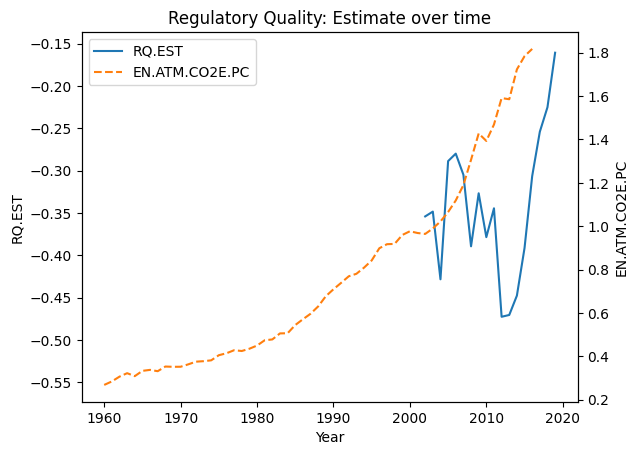

In [252]:
plot_two_indicator(indicator_code_list,1,0,esg_data_df,'India')

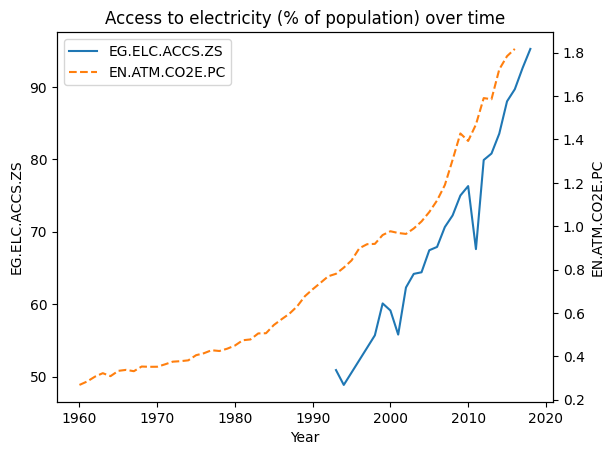

In [253]:
plot_two_indicator(indicator_code_list,2,0,esg_data_df,'India')

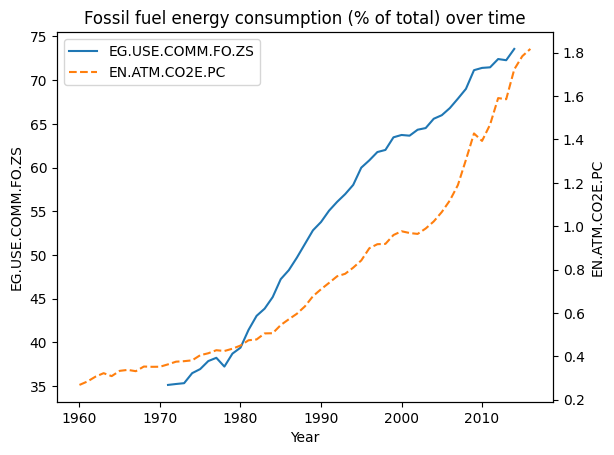

In [254]:
plot_two_indicator(indicator_code_list,3,0,esg_data_df,'India')

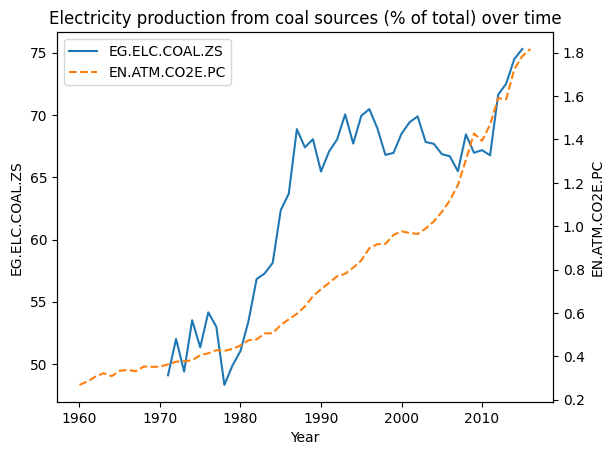

In [255]:
plot_two_indicator(indicator_code_list,4,0,esg_data_df,'India')

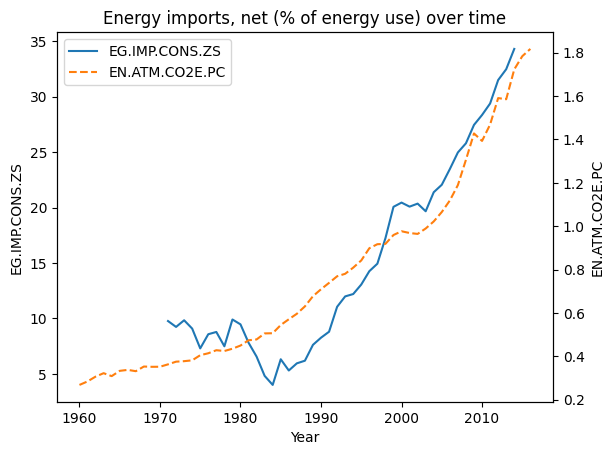

In [256]:
plot_two_indicator(indicator_code_list,5,0,esg_data_df,'India')

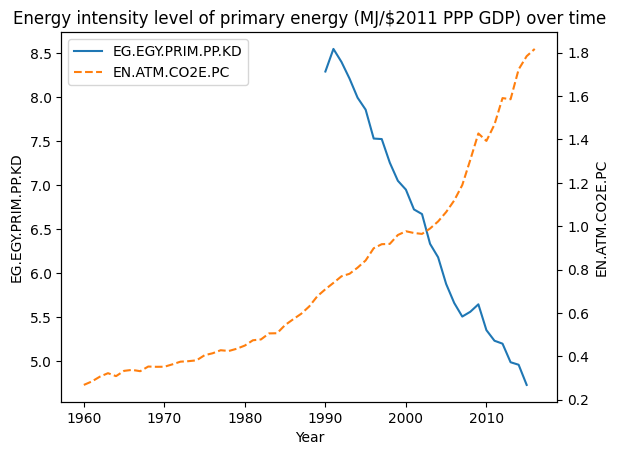

In [257]:
plot_two_indicator(indicator_code_list,6,0,esg_data_df,'India')